# BankNote Authentication

In [77]:
# Importing required modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000



array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

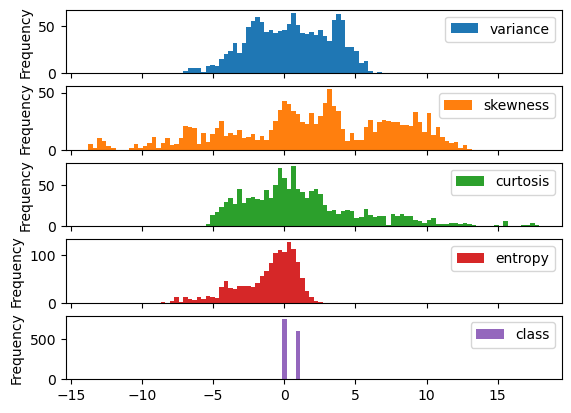

In [78]:
# Reading Banknote Authentication dataset
df = pd.read_csv(
    "data_banknote_authentication.txt",
    header=None,
    names=["variance", "skewness", "curtosis", "entropy", "class"],
)

print(df.describe())
print()
# Plotting data distribution
df.plot(kind="hist", subplots=True, bins=100)

# Part 1.

First, we will need split the data in train and test sets. (Note that you can do this with train_test_split from sklearn.) Use 80% train, 20% test.


In [80]:
x = df.drop("class", axis=1)
y = df["class"]

# test train split
(X_train, X_test, y_train, y_test) = train_test_split(
    x, y, test_size=0.2, random_state=123
)

print("Shapes for the created vectors:")
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

Shapes for the created vectors:
X_train:  (1097, 4)
y_train:  (1097,)
X_test:  (275, 4)
y_test:  (275,)


## Part 2.

Fit a logistic regression model and compute accuracy on the test set. You can use the sklearn.linear_model and sklearn.metrics modules for this.


In [81]:
def logisticReg(X_train, X_test, y_train, y_test):
    """
    Train a logistic regression model using sklearn's implementation and calculate accuracy.

    Parameters:
    X_train : array-like, shape (n_samples, n_features)
        Training input data.

    X_test : array-like, shape (n_samples, n_features)
        Testing input data.

    y_train : array-like, shape (n_samples,)
        Training target values.

    y_test : array-like, shape (n_samples,)
        Testing target values.

    Returns:
    float
        Model accuracy on the test data.
    """
    logisticRegr = LogisticRegression()
    logisticRegr.fit(X_train, y_train)
    y_pred = logisticRegr.predict(X_test)
    model_score = accuracy_score(y_test, y_pred)
    return model_score

In [82]:
logisticReg(X_train, X_test, y_train, y_test)

0.9890909090909091

In [83]:
# Sigmoid Activation Function
def sigmoidFunction(z):
    """
    Compute the sigmoid function.

    Parameters:
    z : array-like
        Input to the sigmoid function.

    Returns:
    array-like
        Output of the sigmoid function.
    """
    return 1 / (1 + np.exp(-z))

In [84]:
def oneLNN_L2(X_train, X_test, y_train, y_test, lamda=0, lr=0.001, epochs=100):
    """
    Train a one-layer neural network with L2 regularization.

    Parameters:
    X_train : array, shape (n_samples, n_features)
        Training input data.

    X_test : array, shape (n_samples, n_features)
        Testing input data.

    y_train : array, shape (n_samples,)
        Training target values.

    y_test : array, shape (n_samples,)
        Testing target values.

    lamda : float, optional
        Regularization parameter (L2 penalty). Default is 0.

    lr : float, optional
        Learning rate for gradient descent. Default is 0.001.

    epochs : int, optional
        Number of training epochs (iterations). Default is 100.

    Returns:
    dict
        Dictionary with keys:
            - 'weights': Array of learned weights for the neural network.
            - 'biases': Array of learned biases for the neural network.
            - 'accuracy': Model accuracy on the test data.
            - 'lamda': Regularization parameter used.

    Notes:
    This function trains a one-layer neural network using gradient descent
    with sigmoid activation and L2 regularization. Accuracy is computed on
    the provided test data.
    """
    np.random.seed(0)
    W = np.random.rand(4, 1)
    B = np.random.rand(1)

    for _ in range(epochs):
        z = np.dot(X_train, W) + B
        A = sigmoidFunction(z)
        dCW = np.dot(X_train.T, A - (y_train.values.reshape(-1, 1))) + (lamda * W)
        dCB = A - (y_train.values.reshape(-1, 1))
        W = W - lr * (dCW)
        B = B - lr * np.sum(dCB)

    y_pred_nn = sigmoidFunction(np.dot(X_test, W) + B)
    y_pred_nn = [0 if i < 0.5 else 1 for i in y_pred_nn]
    model_score_nn = accuracy_score(y_test, y_pred_nn)

    return {"weights": W, "biases": B, "accuracy": model_score_nn, "lamda": lamda}


Now let’s compare with a neural network (NN). However, instead of using sklearn, write out the code to train the NN from scratch. Use a network with a single layer with four neurons (same as the number of features) and sigmoid activation. Initialize the weights randomly, implement forward propagation to compute the predictions, and the backpropagation algorithm to update the weights using gradient descent. It may be helpful to include a learning rate parameter. Run the training process for long enough for the model to converge. Compute the accuracy - you may use sklearn.metrics for this


In [85]:
# executing for 10 epochs
print(oneLNN_L2(X_train, X_test, y_train, y_test, epochs=10))

# executing for 1000 epochs
print(oneLNN_L2(X_train, X_test, y_train, y_test, epochs=1000))

{'weights': array([[-2.01628882],
       [-0.88534796],
       [-1.0836964 ],
       [-0.2445677 ]]), 'biases': array([0.66801435]), 'accuracy': 0.9927272727272727, 'lamda': 0}
{'weights': array([[-3.9895519 ],
       [-2.29902289],
       [-2.78836066],
       [-0.26885729]]), 'biases': array([4.28990569]), 'accuracy': 0.9890909090909091, 'lamda': 0}


Observation:

1. Training the above data for 10 epochs with the oneLNN_L2 results in 99.27% accuracy, which reduced to 98.90% when number of epochs are increased to 1000.



Recall from class that a single-layer NN with sigmoid activation is essentially equivalent to logistic regression. Compare the accuracy scores from the two models. What accounts for any differences?


Using same train-test split for both sklearn's logistic regression implementation with default parameters and our single layer NN implementation, we found there to be a minor difference in performance.
The results are:

- With sklearn's LR: 98.9090%
- With our implementation, using (lamda = 0, lr = 0.001, epochs = 10): 99.2727%
- With our implementation, using (lamda = 0, lr = 0.001, epochs = 1000): 98.9090%

Expected result: The expectation was to get a lower accuracy score from our LNN as compared to the sklearn's implementation of LR model due to:

- better convergence algorithm (L-BFGS) used in sklearn's implementation than vanilla gradient descent in ours
- we are running our model long enough to converge so it might overfit on the training data which can result in high variance


## Question 5.

Optional bonus question: Retrain your neural network using L2 regularization with lambda = 0.01. Recompute accuracy and compare with your models from the previous questions. What do you observe and why?


In [86]:
# with L2 regularization
oneLNN_L2(X_train, X_test, y_train, y_test, lamda=0.01, lr=0.001, epochs=1000)

{'weights': array([[-3.97412574],
        [-2.29065857],
        [-2.777899  ],
        [-0.26584001]]),
 'biases': array([4.2809067]),
 'accuracy': 0.9890909090909091,
 'lamda': 0.01}

In [87]:
# with no L2 regularization
oneLNN_L2(X_train, X_test, y_train, y_test, lamda=0, lr=0.001, epochs=1000)

{'weights': array([[-3.9895519 ],
        [-2.29902289],
        [-2.78836066],
        [-0.26885729]]),
 'biases': array([4.28990569]),
 'accuracy': 0.9890909090909091,
 'lamda': 0}

    Observation: Accuracy turned out to be the same, with and without L2 regularization. In this case there was no effect of lamda on accuracy

    Expected answer: With L2 regularization, the neural network achieved a higher accuracy compared to the neural network without regularization. Regularization helps prevent overfitting and generally improves the model's generalization performance


## Question 6.

Optional bonus question: Lambda is a hyperparameter. Implement a cross-validation procedure to tune it and report accuracy for the tuned version of the model. You can also tune the learning rate if you wish, although tuning both parameters will complicate your parameter search procedure


In [88]:
def lamdaSearchKCrossVal(data, K, l_start=0.0, l_end=0.5, l_step=0.01):
    """
    Perform a lambda search with K-fold cross-validation to find the best lambda (λ) value for L2 regularization.

    Parameters:
        data (pd.DataFrame): The dataset containing features and labels.
        K (int): The number of folds for K-fold cross-validation.
        l_start (float): The starting value for lambda.
        l_end (float): The ending value for lambda.
        l_step (float): The step size for lambda.

    Returns:
        dict: A dictionary containing lambda values as keys and their corresponding average accuracies as values.
              Additionally, 'best_lamda' key stores the best lambda found, and 'max_acc' key stores the maximum accuracy.
    """
    # Initialize variables to track the best lambda and maximum average accuracy
    max_avg_acc = 0
    best_lamda = 0
    lamda = l_start
    lamda_results = {}

    # Iterate over lambda values within the specified range with the given step
    while lamda <= l_end:
        data = data.sample(frac=1, random_state=0).reset_index(drop=True)
        data_split = np.array_split(data, K)
        acc_agg = 0

        # Perform K-fold cross-validation
        for i in range(K):
            test_i = data_split[i]
            train_i = data_split.copy()
            del train_i[i]
            train_i = pd.concat(train_i, sort=False)

            # Split data into features and labels for training and testing
            train_i_x = train_i.drop("class", axis=1)
            train_i_y = train_i["class"]
            test_i_x = test_i.drop("class", axis=1)
            test_i_y = test_i["class"]

            # Call a function to train and evaluate the model with L2 regularization
            result = oneLNN_L2(train_i_x, test_i_x, train_i_y, test_i_y, lamda=lamda)
            acc_agg += result["accuracy"]

        # Update the best lambda and maximum average accuracy
        if max_avg_acc <= float(acc_agg / K):
            max_avg_acc = float(acc_agg / K)
            best_lamda = lamda

        # Store the accuracy for this lambda value
        lamda_results[round(lamda, 3)] = round(acc_agg / K, 8)
        lamda = lamda + l_step

    # Store the best lambda and maximum accuracy in the results dictionary
    lamda_results["best_lamda"] = round(best_lamda, 3)
    lamda_results["max_acc"] = round(max_avg_acc, 8)

    return lamda_results

In [89]:
lamdaSearchKCrossVal(df, 10)

{0.0: 0.98833175,
 0.01: 0.98834233,
 0.02: 0.98833704,
 0.03: 0.98906167,
 0.04: 0.98833704,
 0.05: 0.98833175,
 0.06: 0.98832117,
 0.07: 0.98834233,
 0.08: 0.98833175,
 0.09: 0.98833704,
 0.1: 0.98833704,
 0.11: 0.98834233,
 0.12: 0.9883529,
 0.13: 0.98833704,
 0.14: 0.98832646,
 0.15: 0.98833175,
 0.16: 0.9883529,
 0.17: 0.98833175,
 0.18: 0.98833704,
 0.19: 0.98906167,
 0.2: 0.98834233,
 0.21: 0.98832117,
 0.22: 0.98833704,
 0.23: 0.98833175,
 0.24: 0.98833704,
 0.25: 0.98905638,
 0.26: 0.98906167,
 0.27: 0.98833175,
 0.28: 0.98906696,
 0.29: 0.98833175,
 0.3: 0.98834233,
 0.31: 0.98834233,
 0.32: 0.98906696,
 0.33: 0.98834233,
 0.34: 0.98832646,
 0.35: 0.98834233,
 0.36: 0.98905638,
 0.37: 0.98834233,
 0.38: 0.98832646,
 0.39: 0.98906696,
 0.4: 0.98834761,
 0.41: 0.98905109,
 0.42: 0.98907225,
 0.43: 0.98905638,
 0.44: 0.98833175,
 0.45: 0.98832646,
 0.46: 0.98833175,
 0.47: 0.98833175,
 0.48: 0.98833704,
 0.49: 0.98833704,
 'best_lamda': 0.42,
 'max_acc': 0.98907225}

The best lambda value that maximizes accuracy is 0.42, resulting in a maximum accuracy of approximately 98.98%.


## Personal Question:

Find out the effects of applying various forms of normalaztion and standardization.


In [90]:
x_standardize = (x - x.mean()) / x.std()  # standardization
x_normal_0 = (x - x.min()) / (x.max() - x.min())  # 0-1 normalization
x_normal_1 = x / x.abs().max()  # (-1)-1 normalization
data = {
    "orginal": x,
    "standardize": x_standardize,
    "min_max_normalize": x_normal_0,
    "abs_max_normalize": x_normal_1,
}
accuracy_scores = {}
for key, x in data.items():
    # test train split
    (X_train, X_test, y_train, y_test) = train_test_split(
        x, y, test_size=0.2, random_state=123
    )

    accuracy_scores[key] = oneLNN_L2(X_train, X_test, y_train, y_test)

(accuracy_scores)

{'orginal': {'weights': array([[-2.25747136],
         [-1.372657  ],
         [-1.58111536],
         [-0.24331684]]),
  'biases': array([2.37259431]),
  'accuracy': 0.9890909090909091,
  'lamda': 0},
 'standardize': {'weights': array([[-3.56892666],
         [-3.02321142],
         [-2.83044178],
         [ 0.27704656]]),
  'biases': array([-0.71525498]),
  'accuracy': 0.9709090909090909,
  'lamda': 0},
 'min_max_normalize': {'weights': array([[-4.0659001 ],
         [-1.38516724],
         [ 0.52574709],
         [ 0.84923846]]),
  'biases': array([1.92407954]),
  'accuracy': 0.8581818181818182,
  'lamda': 0},
 'abs_max_normalize': {'weights': array([[-4.76895639],
         [-2.40030496],
         [-1.29851275],
         [ 0.13723572]]),
  'biases': array([0.35159387]),
  'accuracy': 0.92,
  'lamda': 0}}